
## SuperVised Learning - II

In [5]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification,make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset



<IPython.core.display.Javascript object>


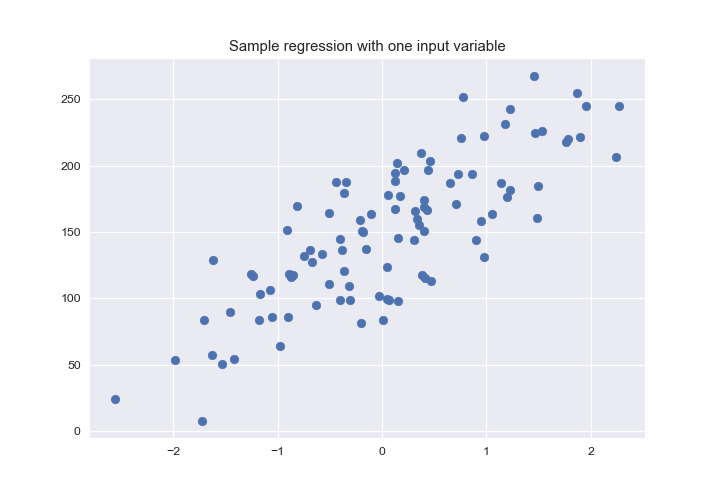

<IPython.core.display.Javascript object>


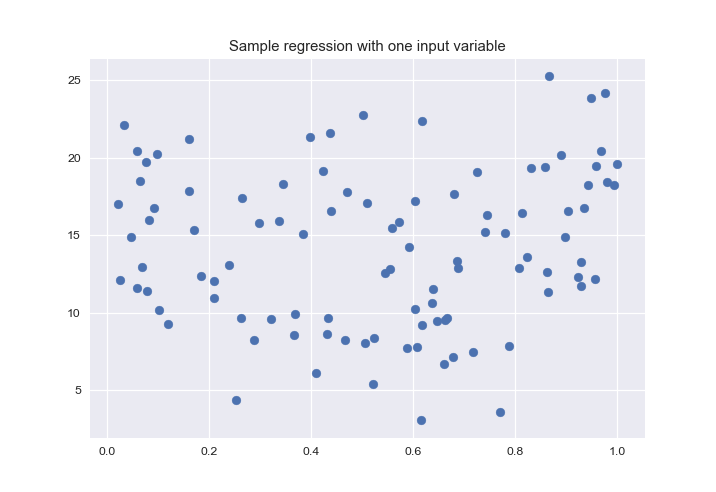

<IPython.core.display.Javascript object>


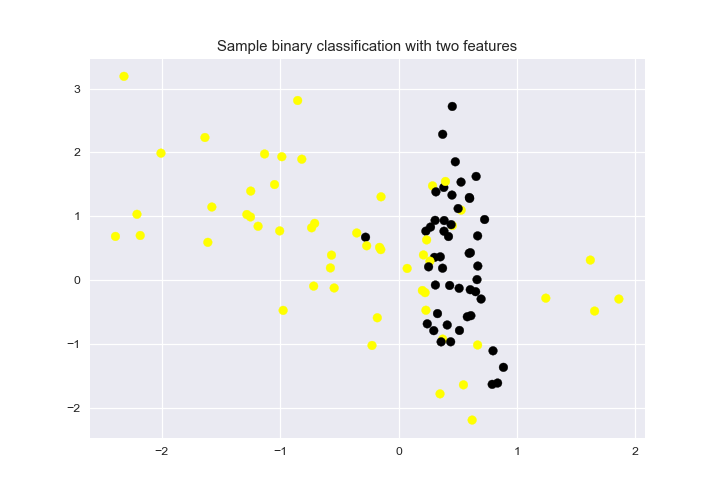

<IPython.core.display.Javascript object>


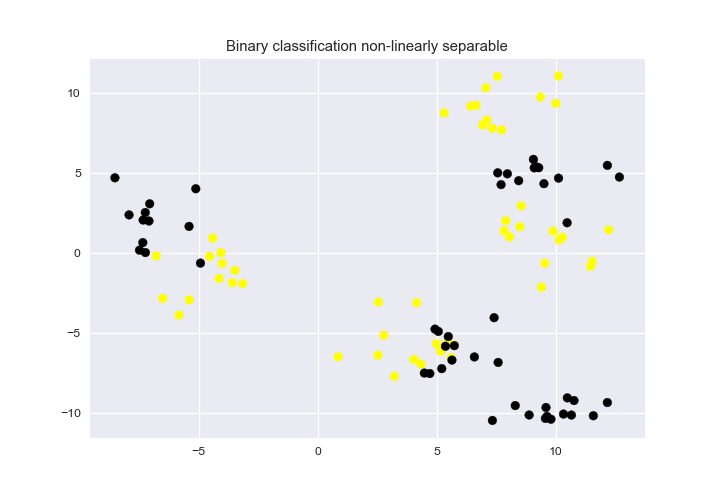

In [6]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height','width','mass','color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits =fruits['fruit_label']
target_names_fruits =['apple','mandarin','orange','lemon']

X_fruits_2d = fruits[['height','width']]
y_fruits_2d = fruits['fruit_label']

# data for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression with one input variable')
X_R1,y_R1 = make_regression(n_samples=100,n_features=1,n_informative=1,
                           bias=150.0,noise=30,random_state=0)
plt.scatter(X_R1,y_R1,s=50);

# data for complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Sample regression with one input variable')
X_F1,y_F1 = make_friedman1(n_samples=100,n_features=7,random_state=0)
plt.scatter(X_F1[:,2],y_F1,s=50);

# data for binary classification
plt.figure()
plt.title('Sample binary classification with two features')
X_C2,y_C2 = make_classification(n_samples=100,n_features=2,n_redundant=0,
                                n_informative=2,n_clusters_per_class=1,
                                flip_y=0.1,class_sep=0.5,random_state=0)
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2,cmap=cmap_bold)

# data for binary classification non-linearly separable
X_D2,y_D2 = make_blobs(n_samples=100,n_features=2,centers=8,
                      cluster_std=1.3,random_state=4)
y_D2 = y_D2 %2
plt.figure()
plt.title('Binary classification non-linearly separable')
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2,cmap=cmap_bold)

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer,y_cancer)= load_breast_cancer(return_X_y=True)

#Crime dataset
(X_crime,y_crime) = load_crime_dataset()

## Naive Bayes classifiers

<IPython.core.display.Javascript object>


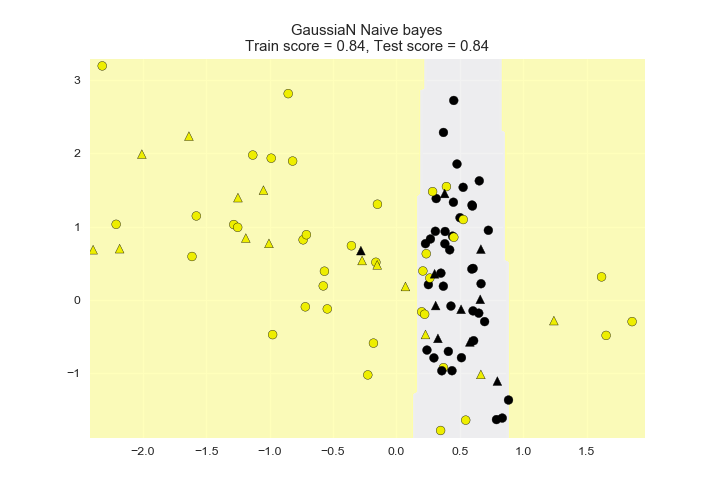

In [23]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)

nbclf = GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier(nbclf,X_train,y_train,X_test,y_test,'GaussiaN Naive bayes')

<IPython.core.display.Javascript object>


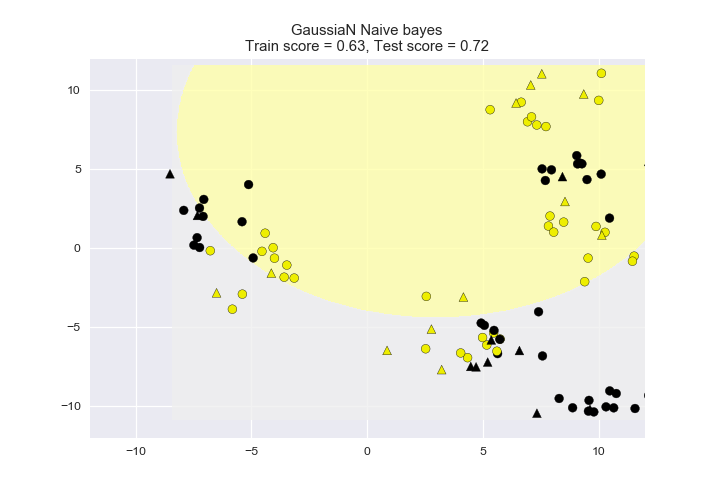

In [24]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)

nbclf = GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier(nbclf,X_train,y_train,X_test,y_test,'GaussiaN Naive bayes')

In [25]:
# TO a real data set
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
nbclf = GaussianNB().fit(X_train,y_train)
print('Train Accuracy :',nbclf.score(X_train,y_train))
print('Test Accuracy :',nbclf.score(X_test,y_test))

Train Accuracy : 0.950704225352
Test Accuracy : 0.937062937063


# Ensembles of Decision Trees

## Random Forests

<IPython.core.display.Javascript object>


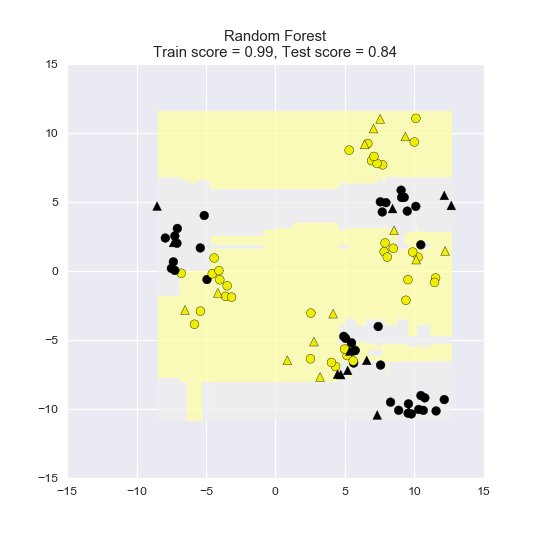

(-15, 15)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train,X_test,y_train,y_test =train_test_split(X_D2,y_D2,random_state=0)

clf = RandomForestClassifier().fit(X_train,y_train)
fig,axes = plt.subplots(1,1,figsize=(6,6))
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,'Random Forest',axes)
plt.xlim([-15,15])
plt.ylim([-15,15])

## Random Forest :  Fruit Dataset

(44, 4)


<IPython.core.display.Javascript object>


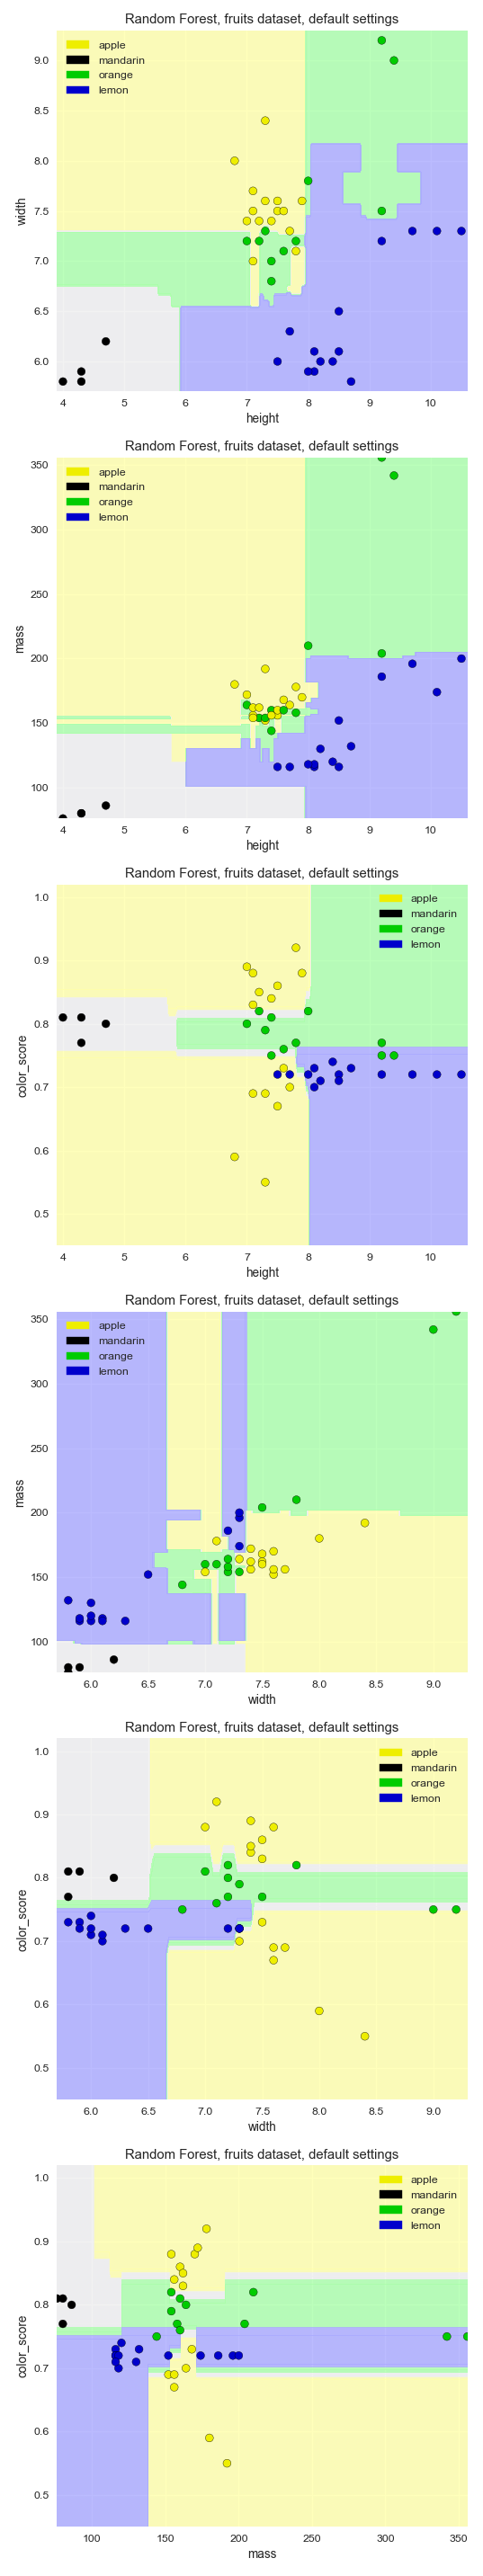

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
print(X_train.shape)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 20,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [57]:
# Random Forest on Real Data
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = RandomForestClassifier(max_features=8,random_state=0).fit (X_train,y_train)

print('Train Accuracy',clf.score(X_train,y_train))
print('Test Accuracy',clf.score(X_test,y_test))


Train Accuracy 0.995305164319
Test Accuracy 0.986013986014


# Gradient-boosted Decision trees

<IPython.core.display.Javascript object>


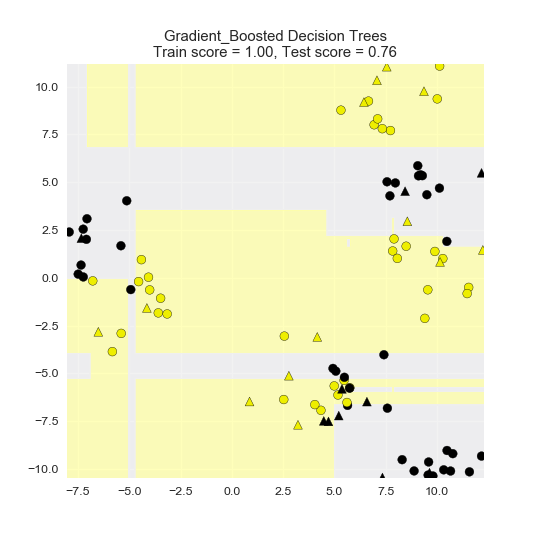

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
clf = GradientBoostingClassifier().fit(X_train,y_train)

fig,subaxes = plt.subplots(1,1, figsize=(6,6))
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,'Gradient_Boosted Decision Trees',
                                         subaxes)

# Gradient boosted on fruits


(44, 4)


<IPython.core.display.Javascript object>


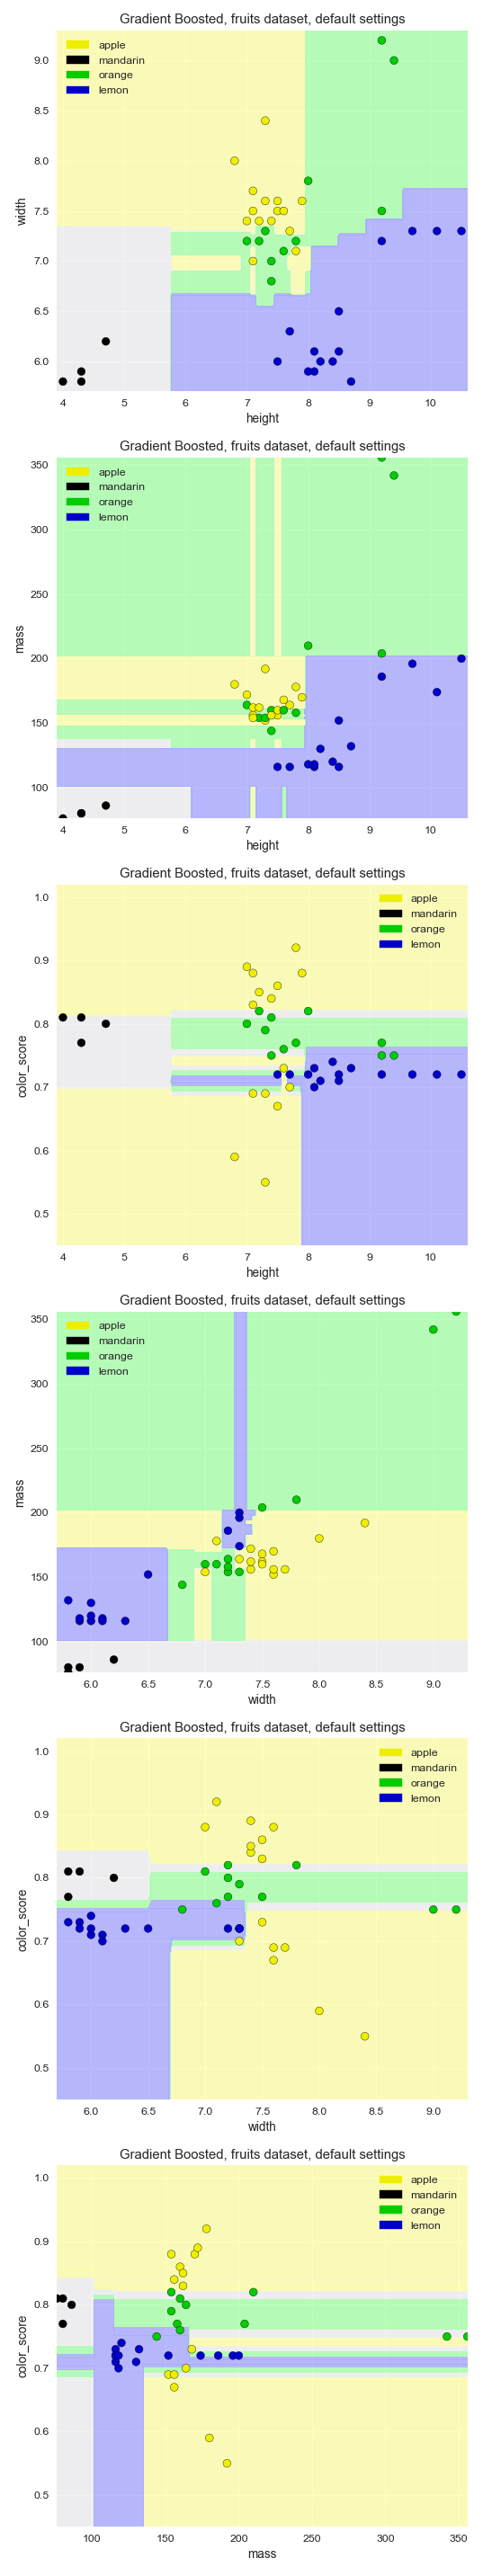

Gradient Boosted, Fruit dataset, default settings
Accuracy of GB classifier on training set: 1.00
Accuracy of GB classifier on test set: 0.80


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
print(X_train.shape)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Gradient Boosted, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = GradientBoostingClassifier(n_estimators = 20,
                            random_state=0).fit(X_train, y_train)

print('Gradient Boosted, Fruit dataset, default settings')
print('Accuracy of GB classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GB classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
print('Default Settings')
clf = GradientBoostingClassifier().fit(X_train,y_train)
print('Train accuracy',clf.score(X_train,y_train))
print('Test accuracy',clf.score(X_test,y_test))
print('learning rate =0.01 , max_depth=3')
clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=3).fit(X_train,y_train)
print('Train accuracy',clf.score(X_train,y_train))
print('Test accuracy',clf.score(X_test,y_test))

Default Settings
Train accuracy 1.0
Test accuracy 0.958041958042
learning rate =0.01 , max_depth=3
Train accuracy 0.988262910798
Test accuracy 0.965034965035


# Neural Networks


## Activation functions

<IPython.core.display.Javascript object>


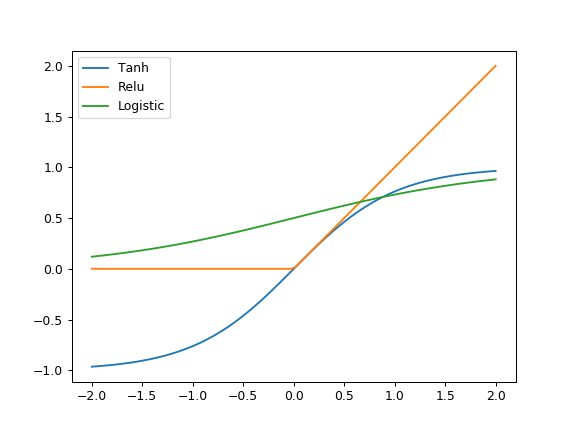

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
xrange = np.linspace(-2,2,100)

plt.figure
plt.plot(xrange,np.tanh(xrange),label='Tanh')
plt.plot(xrange,np.maximum(xrange,0),label='Relu')
plt.plot(xrange,1/(1+np.exp(-xrange)),label='Logistic')
plt.legend()

<IPython.core.display.Javascript object>


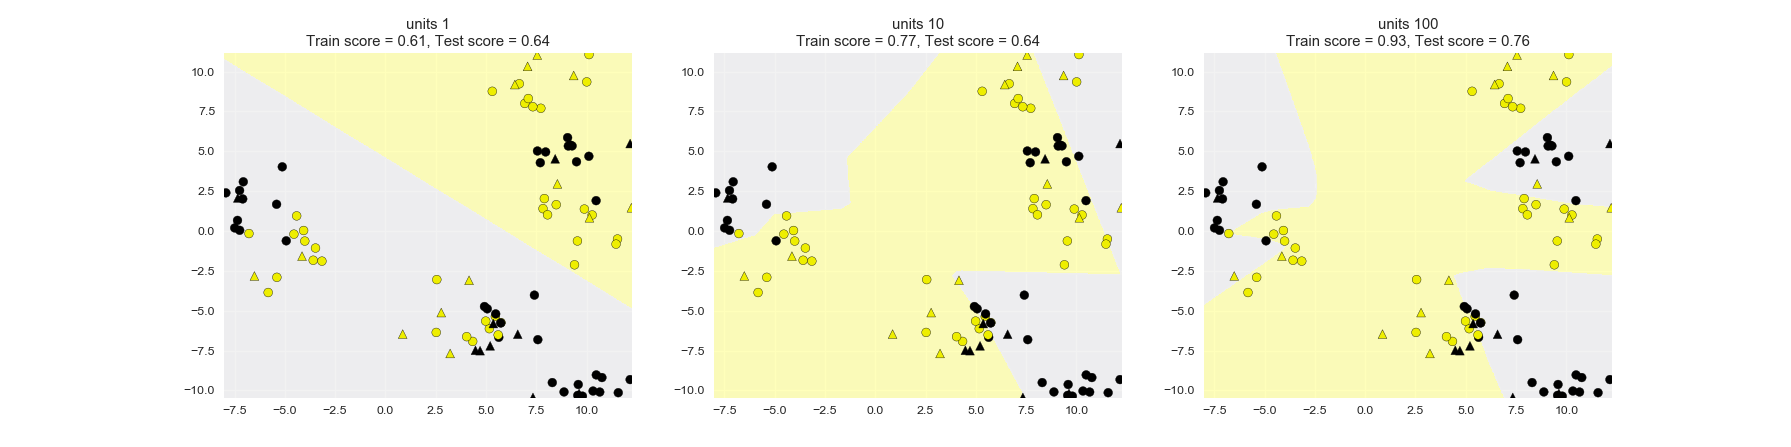

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
units= [1,10,100]
fig,subaxis = plt.subplots(1,3,figsize=(20,5))
for axis, unit in zip(subaxis,units):
    nnclf = MLPClassifier(hidden_layer_sizes=[unit],solver='lbfgs',random_state=0).fit(X_train,y_train)
    title = 'units {}'.format(unit)
    plot_class_regions_for_classifier_subplot(nnclf,X_train,y_train,X_test,y_test,title,axis)


# Two hidden layers

<IPython.core.display.Javascript object>


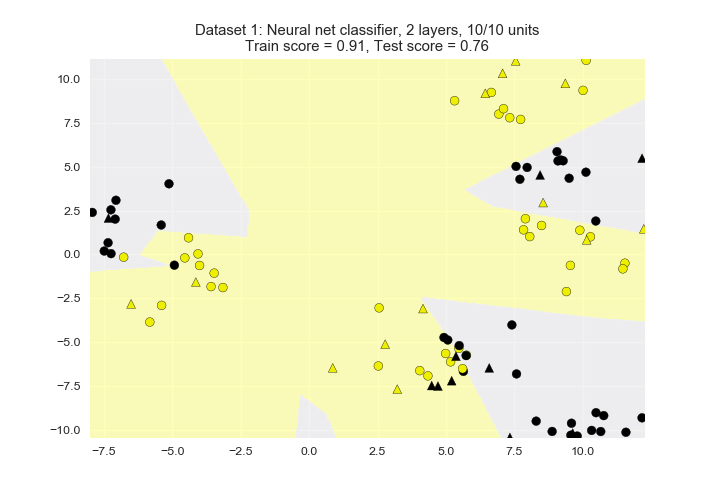

In [27]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# Regularization : alpha

<IPython.core.display.Javascript object>


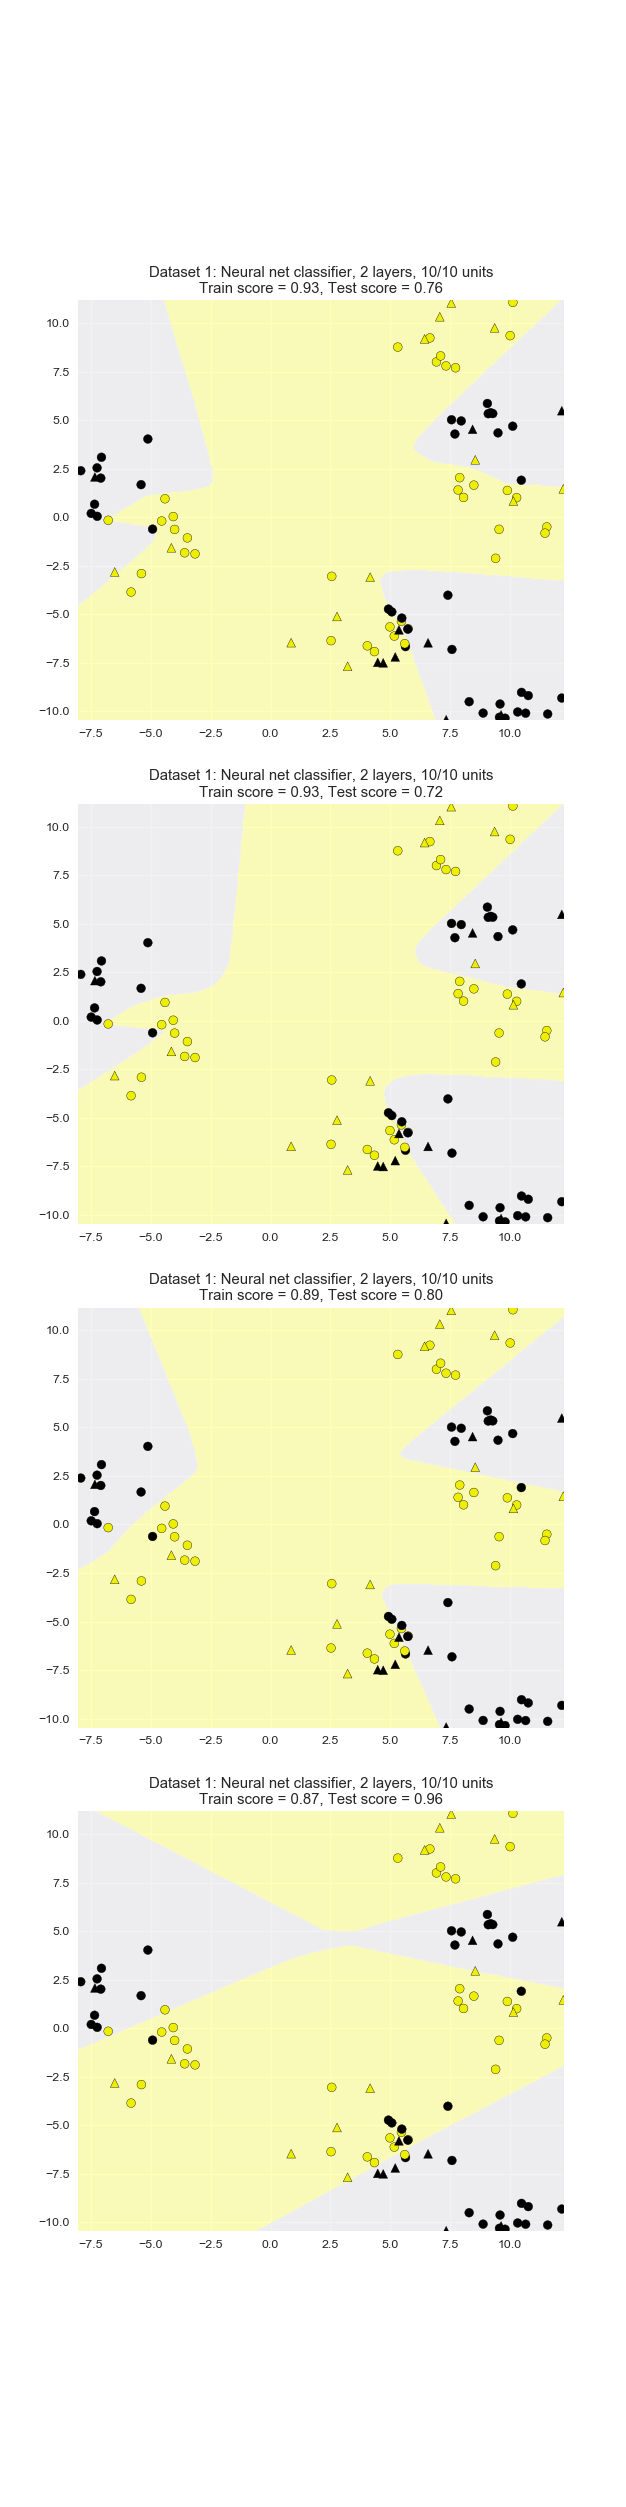

In [30]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig,subaxis  = plt.subplots(4,1,figsize=(7,28))
for this_alpha , axis in zip([0.01,0.1,1,5],subaxis):
    nnclf = MLPClassifier(hidden_layer_sizes = [100, 100],alpha=this_alpha, solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)

    title='Dataset 1: Neural net classifier, 2 layers, 100/100 units aplha={} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test,
                                 title,axis)